# Machine Learning for Structural Health Monitoring using BEM

In this work, we'll present a Machine Learning (ML) approach to Structural Health Monitoring (SHM), by using data from Boundary Element Method (BEM) simulation of a beam, the algorithm will be able to predict the existence and position of a fracture. This is performed by regression and classification tasks.

## Objectives

The end goal of this project is to provide a ML workbench based on the BEM to predict anomalies in mechanical parts from sensor measurements. This workbench will consist of a numerical model for the construction of the sensor measurements, before setting an experimental methodology. To achieve the main goal, the following intermediary goals are set:

- Build a simulation tool to provide accurate estimates of sensor measurements (temperature, position);
- Build a dataset containing instances with and without anomalies
- Build a ML model to detect anomalies and predict its attributes, such as position and radius

## Methodology

Consider a mechanical part subject to various forces. This part will be modeled as a two-dimensional rectangle with sides lenght $L_1$ and $L_2$. This part is made from some material such as steel or aluminium, so it has an specific mass $\rho$, specific heat $\gamma$ and speed of propagation $c$. The part will be subjected to known conditions of acoustic pressure and temperature at its boundaries. Sensors will be placed on any position over the surface of the part and will not contribute to the physics but instead be modeled as internal points. The anomaly will be modeled as a circular hole in the part, located at any point of the surface.

The sensors may measure acoustic pressure, displacement or temperature. Initially the temperature measurements will be considered, as it's the case with less attributes, once temperature is a scalar. 

Once modeled, the following attributes will be used to create the training and testing datasets:

- Presence of anomaly;
- Position of the anomaly;
- Radius of the anomaly;
- Temperature measured by the sensors.

Note that the position of the sensor is not part of the attributes but changing them will affect other attributes.

### Boundary Element Method Model

The BEM is chosen as the preferred method for this task for the following advantages over other methods:

- Requires no mesh generation;
- Good accuracy for internal points;
- Fast and simple 2D algorithm for small models.

The two-dimensional BEM will be used to simulate a variety of scenarios, parts with and without anomalies, different sensor and anomaly positions, different number of anomalies.

The model will consist of linear constant elements forming a rectangle of sides $L_1$ and $L_2$.

### Machine Learning Tasks

Once the dataset is built, the ML tasks must be considered. For our purposes of providing a ML tool to assist in SHM procedures and online automatic detection of anomalies, three ML tasks seem most adequate: Anomaly Detection, Regression and Classification.

#### Anomaly Detection

This is a unsupervised task in which normal behavior is provided so that any anomaly or departure from the normal behaviour is detected. This is useful when there is a large amount of data or a data stream from which new data corresponding to the correct behavior of the system. 

This is the case for sensor measurements which can provide new data for training and anomaly detection alike.

#### Regression

Another possibility is to assume there is an anomaly and try to predict its radius and position. This task can be accomplished by Linear and Polynomial Regressions, which are supervised ML algorithms.

#### Classification

Once an anomaly is detected, it may be useful to classify this anomaly based on other attributes. Parts with anomalies of radius larger than a certain amount may be deemed inapropriate to maintain in use. This can be achieved by training aa Classification algorithm so a new instance can be categorized based on its attribute to determine if the part is still in working condition.

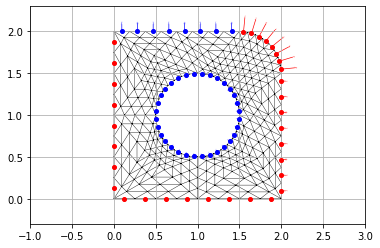

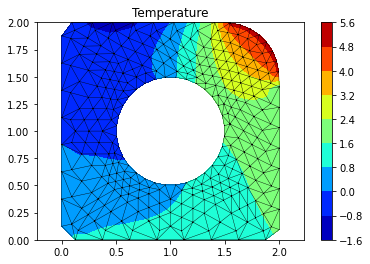

In [1]:
"""
First, we'll need a database of simulations
We'll use the BEM to generate a large collection of simulations
of our beam. The simulation will consist of a rectangle with
known temperatures on its smaller sides and no heat flux on 
the longer sides.

The simulation will also contain cases with a fracture, which 
will be represented as a circular hole. The BEM makes this easy
as no new mesh must be created while changing the position of
the hole. 

We'll use the BB implementation of the BEM available here:

""" 

import numpy as np
import bem2d.geometry as geometry
import bem2d.solve as solve
import bem2d.index as index
import bem2d.input_data as input_data
import bem2d.graphics_problem as graphics_problem

bctype,bcvalue,k,file=input_data.input_data3()

inode_bound,inode_int,inode_all,coord,elem,segments,tri=geometry.compute_inodes(file)

node_med, normal = geometry.comp_node_and_normal(elem, coord)

H, G = index.mount_matrix(node_med,normal,coord,elem,k)

bcs = index.mount_bcs(segments,bctype,bcvalue)
 
A, b = index.mount_linear_system(H, G, bcs)

x = np.linalg.solve(A, b)
T, q = index.mount_vector(x, bcs)
Hin, Gin = solve.int_point(inode_int,normal,coord,elem,k)
Tint = np.dot(Hin,T) - np.dot(Gin,q)

graphics_problem.show_problem(node_med,normal,coord,bcs,tri)
graphics_problem.show_results(inode_all,inode_int,node_med,elem,coord,T,q,Tint)

# Para fazer o exercício da lista 3.
node_int_coord=np.array([[0.25,.25],[.5,.5]])
Hin2,Gin2=solve.int_point2(node_int_coord,normal,coord,elem,k)
Tint2= np.dot(Hin2,T) - np.dot(Gin2,q)


def generate_part(L_x=1,L_y=1):
    return [L_x,L_y]
def add_hole(part,c=[0,0],r=1):
    return part.append(c)
def add_sensor(part):
    pass
def add_bb(part,holes):
    pass
